In [73]:
import pandas as pd
df = pd.read_csv("Data01.csv", index_col="no")
df

,text,translate,label1,label2,average
no,,,,,
1,padahal ppkm sudah putus pada tanggal harus su...,even though PPKM has been broken on the date i...,0,0,0
2,since ppkm yg bikin mood ancur bikin frustrate...,since it was PPKM that ruined the mood and mad...,0,0,0
3,ppkm belum hilang sudah ancam prediksi gelomba...,"PPKM hasn't disappeared, it's already threaten...",0,0,0
4,paksa karna ppkm,forced because of ppkm,0,0,0
5,wali kota malang bukti langgar vonis denda juta,the mayor of Malang is proof of violating the ...,0,0,0
...,...,...,...,...,...
356,ppkm lindung masyarakat dari kena virus korona,PPKM protects the public from getting infected...,2,0,1
357,wakil ketua umum bidang koperasi dan umkm kadi...,Kadin Deputy General Chairperson for Cooperati...,2,0,1
358,ubah atur ppkm level pasar dan mal boleh buka ...,"change the PPkm at market and mall levels, you...",2,0,1


In [74]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Remove user mention
def func(string):

    strlist = string.split()
    strlistnew = []
    for i in strlist:
        if i[0] == '@' or 'http' or '#' in i:
            pass
        if i.isalpha():
            strlistnew.append(i)  
    new = ' '.join(strlistnew)   
    stringNew   = stemmer.stem(new)    
    return stringNew

df['text'] = df['text'].apply(func)
df['text'] = df['text'].str.lower()
df

,text,translate,label1,label2,average
no,,,,,
1,padahal ppkm sudah putus pada tanggal harus su...,even though PPKM has been broken on the date i...,0,0,0
2,since ppkm yg bikin mood ancur bikin frustrate...,since it was PPKM that ruined the mood and mad...,0,0,0
3,ppkm belum hilang sudah ancam prediksi gelomba...,"PPKM hasn't disappeared, it's already threaten...",0,0,0
4,paksa karna ppkm,forced because of ppkm,0,0,0
5,wali kota malang bukti langgar vonis denda juta,the mayor of Malang is proof of violating the ...,0,0,0
...,...,...,...,...,...
356,ppkm lindung masyarakat dari kena virus korona,PPKM protects the public from getting infected...,2,0,1
357,wakil ketua umum bidang koperasi dan umkm kadi...,Kadin Deputy General Chairperson for Cooperati...,2,0,1
358,ubah atur ppkm level pasar dan mal boleh buka ...,"change the PPkm at market and mall levels, you...",2,0,1


In [75]:
from textblob import TextBlob

def func2(string):
    
    kata = TextBlob(string)
    hasil = kata.translate(from_lang='id', to='en')
    
    return str(hasil)

df['translate'] = df['text'].apply(func2)
df

,text,translate,label1,label2,average
no,,,,,
1,padahal ppkm sudah putus pada tanggal harus su...,even though PPKM has been broken on the date i...,0,0,0
2,since ppkm yg bikin mood ancur bikin frustrate...,since it was PPKM that ruined the mood and mad...,0,0,0
3,ppkm belum hilang sudah ancam prediksi gelomba...,"PPKM hasn't disappeared, it's already threaten...",0,0,0
4,paksa karna ppkm,forced because of ppkm,0,0,0
5,wali kota malang bukti langgar vonis denda juta,the mayor of Malang is proof of violating the ...,0,0,0
...,...,...,...,...,...
356,ppkm lindung masyarakat dari kena virus korona,PPKM protects the public from getting infected...,2,0,1
357,wakil ketua umum bidang koperasi dan umkm kadi...,Kadin Deputy General Chairperson for Cooperati...,2,0,1
358,ubah atur ppkm level pasar dan mal boleh buka ...,"change the PPkm at market and mall levels, you...",2,0,1


In [76]:
# import pandas as pd
# dft = pd.read_csv("Data01.csv", index_col="no")
# dft

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def func(string):
    result = analyzer.polarity_scores(string)
    num = result['compound']
    if num < 0:
        polar = 0
    elif num > 0.3:
        polar = 2
    else:
        polar = 1
    return polar

df['vaderAnalysis'] = df['translate'].apply(func)
df[['text','translate','average','vaderAnalysis']]

,text,translate,average,vaderAnalysis
no,,,,
1,padahal ppkm sudah putus pada tanggal harus su...,even though PPKM has been broken on the date i...,0,0
2,since ppkm yg bikin mood ancur bikin frustrate...,since it was PPKM that ruined the mood and mad...,0,0
3,ppkm belum hilang sudah ancam prediksi gelomba...,"PPKM hasn't disappeared, it's already threaten...",0,0
4,paksa karna ppkm,forced because of ppkm,0,0
5,wali kota malang bukti langgar vonis denda juta,the mayor of Malang is proof of violating the ...,0,0
...,...,...,...,...
356,ppkm lindung masyarakat dari kena virus korona,PPKM protects the public from getting infected...,1,0
357,wakil ketua umum bidang koperasi dan umkm kadi...,Kadin Deputy General Chairperson for Cooperati...,1,0
358,ubah atur ppkm level pasar dan mal boleh buka ...,"change the PPkm at market and mall levels, you...",1,0


# Vader Sentiment Analysis Result

In [78]:
correct = 0
count = 0
for index, row in df.iterrows():
    count += 1
    if row['vaderAnalysis'] == row['average']:
        correct += 1
print(correct/count)

0.8361111111111111


# ANN Sentimen Analisis

In [205]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [206]:
import torch
from torch import nn, optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [207]:
df.count()

text             360
translate        360
label1           360
label2           360
average          360
vaderAnalysis    360
dtype: int64

,missing_value,%
text,0,0.0
translate,0,0.0
label1,0,0.0
label2,0,0.0
average,0,0.0
vaderAnalysis,0,0.0


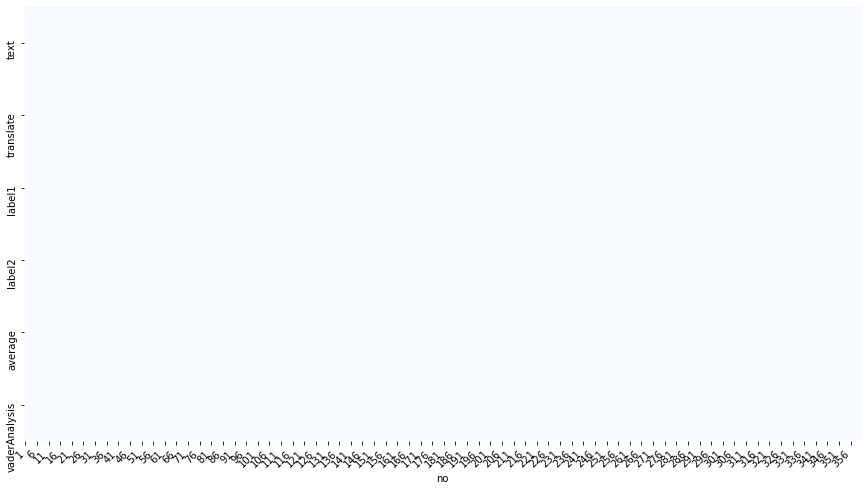

In [208]:
plot_missing_value(df, return_df=True)

In [209]:
df.average.value_counts(normalize=True)

0    0.355556
1    0.347222
2    0.297222
Name: average, dtype: float64

In [210]:
df.vaderAnalysis.value_counts(normalize=True)

1    0.388889
2    0.319444
0    0.291667
Name: vaderAnalysis, dtype: float64

In [754]:
X = df.text.values
y = df.average.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((288,), (72,), (288,), (72,))

In [755]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
sw_indo = stopwords.words("indonesian") + list(punctuation)

# Preprocessing Data
## Stop words Removal
## Tokenisasi dan Tfidf Vectorizer

In [756]:
preprocessor = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)), #, max_features=500, ngram_range=(1,2)
])

In [757]:
X_train = preprocessor.fit_transform(X_train).toarray()
X_test = preprocessor.transform(X_test).toarray()

C:\Users\AFA\miniconda3\envs\jcopdl\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [758]:
preprocessor['prep'].get_feature_names()

['abal',
 'abar',
 'abis',
 'abu',
 'acara',
 'aceh',
 'agung',
 'aiptu',
 'air',
 'aja',
 'ajar',
 'akademik',
 'akhmad',
 'akibat',
 'akp',
 'aktivitas',
 'alami',
 'alat',
 'alex',
 'alexander',
 'ambil',
 'amt',
 'an',
 'anak',
 'ancam',
 'ancur',
 'and',
 'andir',
 'anggap',
 'anggota',
 'angka',
 'anjur',
 'antisipasi',
 'aparat',
 'app',
 'apresiasi',
 'arah',
 'area',
 'arif',
 'artikel',
 'asesmen',
 'asing',
 'asli',
 'asn',
 'asu',
 'athari',
 'atlet',
 'atur',
 'aulia',
 'awas',
 'ayo',
 'babinsa',
 'baca',
 'badung',
 'bahas',
 'baju',
 'bal',
 'balaidesa',
 'balang',
 'bandara',
 'banding',
 'bando',
 'bandung',
 'bandungrejo',
 'banget',
 'bangettt',
 'bangga',
 'bangkit',
 'banjarbaru',
 'banjarmasin',
 'bank',
 'bansos',
 'bantah',
 'barat',
 'bareng',
 'bas',
 'batang',
 'batas',
 'batu',
 'bawa',
 'bayan',
 'bayar',
 'bbm',
 'bebas',
 'bego',
 'belat',
 'benny',
 'bentuk',
 'beraktifitas',
 'berani',
 'berat',
 'berita',
 'berkat',
 'bgt',
 'bhabinkamtibmas',
 'biar'

In [759]:
from torch.utils.data import DataLoader, TensorDataset

In [760]:
X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

In [761]:
bs = 128

train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=8)

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=bs, num_workers=8)

In [762]:
len(train_set), len(test_set), len(trainloader), len(testloader)

(288, 72, 3, 1)

# Arsitektur dan Config

In [763]:
from jcopdl.layers import linear_block

In [764]:
class FashionClassfier(nn.Module):
    def __init__(self, input_size, output_size, dropout=0.2):
        super().__init__()
        self.fc = nn.Sequential(
            linear_block(input_size, 64, dropout=dropout),
            linear_block(64, 64, dropout=dropout),
            linear_block(64, output_size, activation="lsoftmax") #, activation="lsoftmax"
        )
         
    def forward(self, x):
        return self.fc(x)      

In [765]:
from jcopdl.callback import Callback, set_config

config = set_config({
    "input_size": X_train.shape[1],
    "output_size": 3,
    "dropout": 0.2
})

# Training Prep -> MCOC

In [766]:
model = FashionClassfier(config.input_size, config.output_size, config.dropout).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01)
callback = Callback(model, config, outdir="SentimenModel", early_stop_patience=10)

In [767]:
print(model.train())

FashionClassfier(
  (fc): Sequential(
    (0): Sequential(
      (0): Linear(in_features=914, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (2): Sequential(
      (0): Linear(in_features=64, out_features=3, bias=True)
      (1): LogSoftmax()
    )
  )
)


In [768]:
print(model.eval())

FashionClassfier(
  (fc): Sequential(
    (0): Sequential(
      (0): Linear(in_features=914, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (2): Sequential(
      (0): Linear(in_features=64, out_features=3, bias=True)
      (1): LogSoftmax()
    )
  )
)


# Training 

In [769]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):   
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc



Epoch     1
Train_cost  = 1.0938 | Test_cost  = 1.0767 | Train_score = 0.3889 | Test_score = 0.3889 |




Epoch     2
Train_cost  = 1.0587 | Test_cost  = 1.0146 | Train_score = 0.4028 | Test_score = 0.5278 |




Epoch     3
Train_cost  = 0.9475 | Test_cost  = 0.8830 | Train_score = 0.6250 | Test_score = 0.7083 |




Epoch     4
Train_cost  = 0.7446 | Test_cost  = 0.7255 | Train_score = 0.8542 | Test_score = 0.7639 |




Epoch     5
Train_cost  = 0.4988 | Test_cost  = 0.6143 | Train_score = 0.8854 | Test_score = 0.7500 |
==> EarlyStop patience =  1 | Best test_score: 0.7639




Epoch     6
Train_cost  = 0.3356 | Test_cost  = 0.5977 | Train_score = 0.9097 | Test_score = 0.7500 |
==> EarlyStop patience =  2 | Best test_score: 0.7639




Epoch     7
Train_cost  = 0.2058 | Test_cost  = 0.7198 | Train_score = 0.9132 | Test_score = 0.7361 |
==> EarlyStop patience =  3 | Best test_score: 0.7639




Epoch     8
Train_cost  = 0.1762 | Test_cost  = 0.8095 | Train_score = 0.9201 | Test_score = 0.7639 |
==> EarlyStop patience =  4 | Best test_score: 0.7639




Epoch     9
Train_cost  = 0.1395 | Test_cost  = 0.9128 | Train_score = 0.9271 | Test_score = 0.7361 |
==> EarlyStop patience =  5 | Best test_score: 0.7639




Epoch    10
Train_cost  = 0.1264 | Test_cost  = 1.0768 | Train_score = 0.9375 | Test_score = 0.7222 |
==> EarlyStop patience =  6 | Best test_score: 0.7639




Epoch    11
Train_cost  = 0.1667 | Test_cost  = 1.1841 | Train_score = 0.9201 | Test_score = 0.7222 |
==> EarlyStop patience =  7 | Best test_score: 0.7639




Epoch    12
Train_cost  = 0.1238 | Test_cost  = 1.2720 | Train_score = 0.9444 | Test_score = 0.6806 |
==> EarlyStop patience =  8 | Best test_score: 0.7639




Epoch    13
Train_cost  = 0.1810 | Test_cost  = 1.2661 | Train_score = 0.9167 | Test_score = 0.6806 |
==> EarlyStop patience =  9 | Best test_score: 0.7639




Epoch    14
Train_cost  = 0.1444 | Test_cost  = 1.2306 | Train_score = 0.9306 | Test_score = 0.7222 |
==> EarlyStop patience = 10 | Best test_score: 0.7639
==> Execute Early Stopping at epoch: 14 | Best test_score: 0.7639
==> Best model is saved at SentimenModel


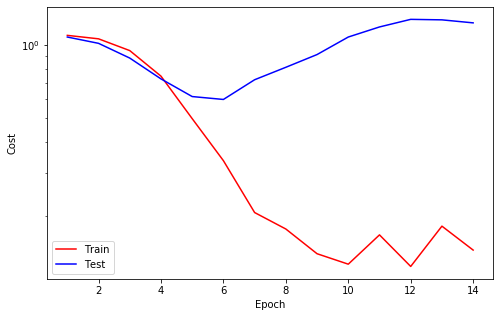

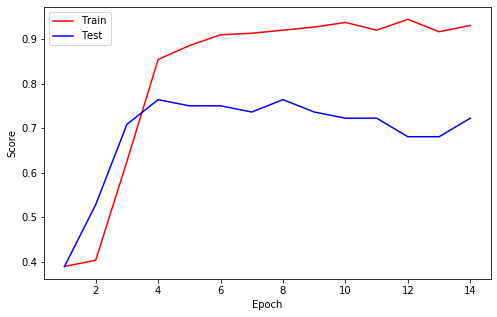

In [770]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)
    
    # Checkpoint
    callback.save_checkpoint()
    
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

In [771]:
X_eval = df.text.values
X_eval = preprocessor.transform(X_eval).toarray()
X_eval = torch.FloatTensor(X_eval).to(device)
with torch.no_grad():
    model.eval()
    output = model(X_eval)

In [772]:
pred = output.argmax(1).numpy()
vader=df['vaderAnalysis'].values
manual=df['average'].values

In [773]:
correctPred = 0
correctVader = 0
count = 0
for i in range(len(pred)):
    count += 1
    if pred[i] == manual[i]:
        correctPred += 1
    if vader[i] == manual[i]:
        correctVader += 1
print('ANN Accuracy:',correctPred/count)
print('Vader Accuracy:',correctVader/count)

ANN Accuracy: 0.8666666666666667
Vader Accuracy: 0.8361111111111111
